<!-- This section contains the code for R, G, B seperation -->

In [12]:
import matplotlib.pyplot as mtpplt
from improc.utils import split_img_channels
import numpy as np

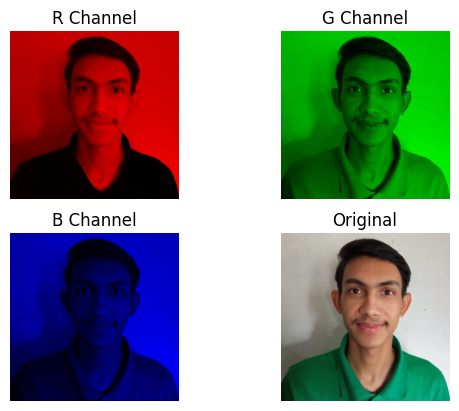

In [20]:
img_path = "../assets/images/rt.jpg"
channel_list = split_img_channels(img_path)
channel_title = ["R", "G", "B"]

mtpplt.figure()
for i in range(len(channel_list)):
    mtpplt.subplot(2, 2, i + 1)
    mtpplt.imshow(channel_list[i])
    mtpplt.axis('off')
    mtpplt.title(channel_title[i] + " Channel")

mtpplt.subplot(2, 2, len(channel_list) + 1)
mtpplt.imshow(mtpplt.imread(img_path))
mtpplt.axis('off')
mtpplt.title("Original")

# saving to output dir
save_path = "../assets/output/RGB-Seperate.png"
mtpplt.savefig(save_path)

mtpplt.show()

<!-- This section contains the code for RGB to Gray Scale -->

<!-- This section contains the RGB to Grayscale -->

In [1]:
import numpy as np
from improc.utils import pixel_iterator
import matplotlib.pyplot as mtpplt

In [2]:
average = lambda pixel: sum(pixel) / len(pixel)
weighted_avg = lambda pixel, weights: average([pixel[i] * weights[i] for i in range(len(pixel))])

In [3]:
def simple_average(pixel) -> np.ndarray:
    return average(pixel)

ntsc_weight = [0.299, 0.587, 0.114]
def ntsc_average(pixel) -> np.ndarray:
    return weighted_avg(pixel, ntsc_weight)

lum_weight = [0.2126, 0.7152, 0.0722]
def lum_average(pixel) -> np.ndarray:
    return weighted_avg(pixel, lum_weight)

In [4]:
img_path = "../assets/images/rt.jpg"
img = np.array(mtpplt.imread(img_path))

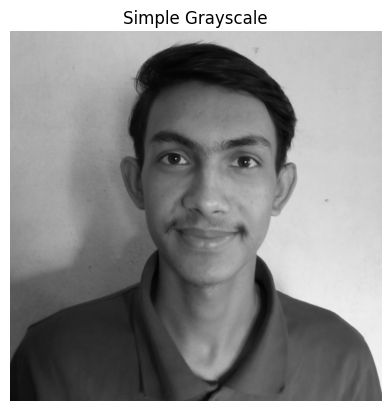

In [7]:
# simple average
simple_result = img.copy()
pixel_iterator(img, simple_average, simple_result)
mtpplt.title("Simple Grayscale")
mtpplt.axis('off')
mtpplt.imshow(simple_result)
mtpplt.show()

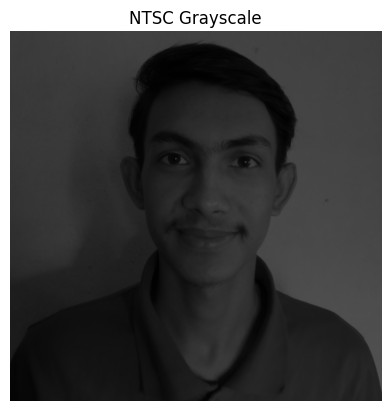

In [8]:
# ntsc weighted average
ntsc_result = img.copy()
pixel_iterator(img, ntsc_average, ntsc_result)
mtpplt.title("NTSC Grayscale")
mtpplt.axis('off')
mtpplt.imshow(ntsc_result)
mtpplt.show()

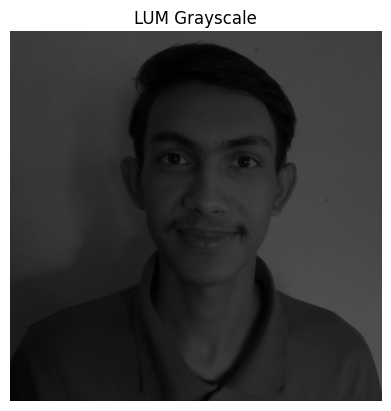

In [10]:
# luminosity method weighted average
lum_result = img.copy()
pixel_iterator(img, lum_average, lum_result)
mtpplt.title("LUM Grayscale")
mtpplt.axis('off')
mtpplt.imshow(lum_result)
mtpplt.show()

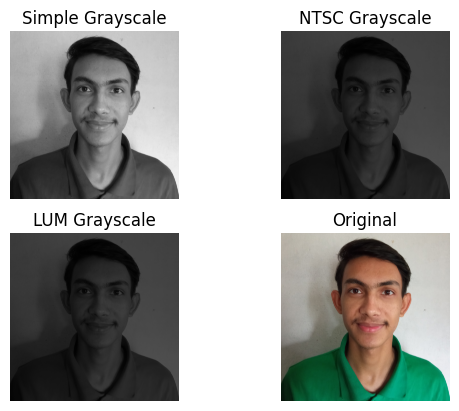

In [19]:
mtpplt.figure()
result_list = [simple_result, ntsc_result, lum_result]
result_title = ["Simple", "NTSC", "LUM"]

for i in range(len(result_list)):
    mtpplt.subplot(2, 2, i + 1)
    mtpplt.imshow(result_list[i])
    mtpplt.axis('off')
    mtpplt.title(result_title[i] + " Grayscale")

mtpplt.subplot(2, 2, len(result_list) + 1)
mtpplt.imshow(img)
mtpplt.axis('off')
mtpplt.title("Original")

# to save in output dir
save_path = "../assets/output/RGB-Grayscale.png"
mtpplt.savefig(save_path)

mtpplt.show()

<!-- Basic impl of RGB-BGR -->

In [29]:
import matplotlib.pyplot as mtpplt
import numpy as np

In [30]:
img_path = "../assets/images/rt.jpg"
img = np.array(mtpplt.imread(img_path))

In [32]:
img_bgr = np.empty_like(img)
img_bgr[:, :, 0] = img[:, :, 2]
img_bgr[:, :, 1] = img[:, :, 1]
img_bgr[:, :, 2] = img[:, :, 0]

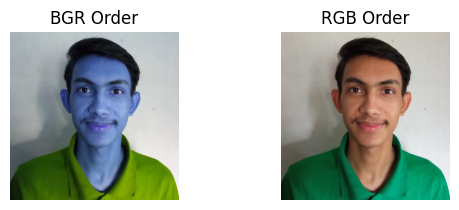

In [33]:
mtpplt.figure()
mtpplt.subplot(2, 2, 1)
mtpplt.imshow(img_bgr)
mtpplt.axis('off')
mtpplt.title("BGR Order")
mtpplt.subplot(2, 2, 2)
mtpplt.imshow(img)
mtpplt.axis('off')
mtpplt.title("RGB Order")

# to save in output dir
save_path = "../assets/output/RGB-BGR.png"
mtpplt.savefig(save_path)

mtpplt.show()

# Edge Detection Segment

In [55]:
import matplotlib.pyplot as mtpplt
import numpy as np
from math import sqrt, pow

In [56]:
sobel_x = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])
sobel_y = sobel_x.T

In [57]:
print(sobel_x)
print(sobel_y)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [ ]:
# sobel_kernel = sqrt(pow(sobel_x, 2) + pow(sobel_y, 2))
# sobel_kernel

In [180]:
img_path = "../assets/images/rt.jpg"
org_img = np.array(mtpplt.imread(img_path))
img = np.dot(org_img[...,:3], [0.2989, 0.5870, 0.1140])

In [181]:
def conv2d(img: np.ndarray, kernel: np.ndarray) -> np.ndarray:

    img_width, img_height = img.shape[0], img.shape[1]
    k_width, k_height = kernel.shape
    pad_w = k_width // 2
    pad_h = k_height // 2

    padded_img = np.pad(img, ((pad_w, pad_w), (pad_h, pad_h)), mode = 'constant')

    # mtpplt.imshow(padded_img, cmap="gray")
    # print(img_width, img_height)
    # print(k_width, k_height)
    # print(pad_w, pad_h)
    # print(img.shape)
    # print(padded_img.shape)

    result = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded_img[i: i + k_width, j: j + k_height]

            result[i, j] = np.sum(region * kernel)

    # np.clip(result, a_min = 0, a_max = 255)

    return result 

In [182]:
def get_rgb(gray: np.ndarray) -> np.ndarray:
    rgb = np.zeros((gray.shape[0], gray.shape[1], 3))

    for i, row in enumerate(gray):
        for j, col in enumerate(row):
            rgb[i][j] = [gray[i, j], gray[i, j], gray[i, j]]

    return rgb

In [164]:
xsobel_result = conv2d(img, sobel_x)
xsobel_result = get_rgb(xsobel_result)
ysobel_result = conv2d(img, sobel_y)
ysobel_result = get_rgb(ysobel_result)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


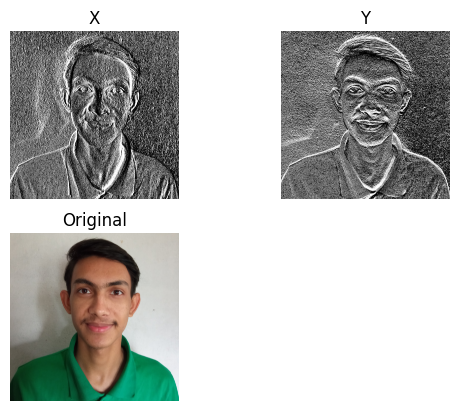

In [174]:
mtpplt.figure()
mtpplt.subplot(2, 2, 1)
mtpplt.axis('off')
mtpplt.title("X")
mtpplt.imshow(xsobel_result, cmap="gray")

mtpplt.subplot(2, 2, 2)
mtpplt.axis('off')
mtpplt.title("Y")
mtpplt.imshow(ysobel_result, cmap="gray")

mtpplt.subplot(2, 2, 3)
mtpplt.axis('off')
mtpplt.title("Original")
mtpplt.imshow(org_img)

# to save in output dir
save_path = "../assets/output/Sobel.png"
mtpplt.savefig(save_path)


mtpplt.show()

In [186]:
laplace_kernel = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

laplace_result = conv2d(img, laplace_kernel)
laplace_result = get_rgb(laplace_result)



In [187]:
laplace_kernel

array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


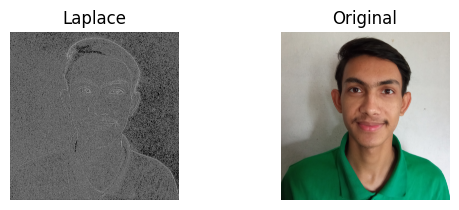

In [188]:
mtpplt.figure()
mtpplt.subplot(2, 2, 1)
mtpplt.axis('off')
mtpplt.title("Laplace")
mtpplt.imshow(laplace_result, cmap="gray")

mtpplt.subplot(2, 2, 2)
mtpplt.axis('off')
mtpplt.title("Original")
mtpplt.imshow(org_img, cmap="gray")

# to save in output dir
save_path = "../assets/output/Laplace.png"
mtpplt.savefig(save_path)

mtpplt.show()